# Propability of Device's Failure

## 1. Overview:

- The purpose of this project is to determine the chance of device's failure ultilizing Machine Learning Technique.
- In addition, glancing through the set of data, each row of the original data represents a record of the status of a devices which listed in attributes #
- By determining how each attributes change, we can create a Machine learning model that would predict the probability of devices' failure

## 2. Import Libraries and Data

### 2.1 Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from scipy.stats import linregress    
from datetime import datetime as dt
from sklearn.metrics import classification_report
#from sklearn.model_selection import GridSearchCV
import xgboost
#from jupyterthemes import jtplot
#jtplot.style(theme='onedork')
%matplotlib inline

/Users/Zia/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 2.2 Data

In [4]:
df = pd.read_csv('failure.csv')

In [5]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
date          124494 non-null object
device        124494 non-null object
failure       124494 non-null int64
attribute1    124494 non-null int64
attribute2    124494 non-null int64
attribute3    124494 non-null int64
attribute4    124494 non-null int64
attribute5    124494 non-null int64
attribute6    124494 non-null int64
attribute7    124494 non-null int64
attribute8    124494 non-null int64
attribute9    124494 non-null int64
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


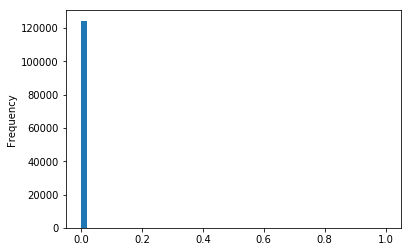

In [7]:
df.failure.plot(kind='hist', bins=50)

### 3.1 Unique Data

In [11]:
device_fail = df['device'][df['failure']==1]
#device_fail = list(device_fail)
(device_fail.nunique(), df.device.nunique())

(106, 1168)

### 3.2 Data Analysis

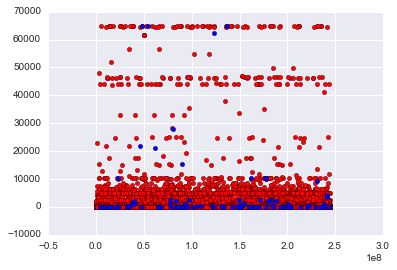

In [16]:
df_0 = df[df['failure']==0]
df_1 = df[df['failure']==1]
plt.scatter(df_0.attribute1, df_0.attribute2, c='r')
plt.scatter(df_1.attribute1, df_1.attribute2, c='b')

In [9]:
device_fail.nunique()

106

Total data was record in an interval of 304 days (less than a year). There are many columns with less than 50 unique values. Something worth to investigate

One thing we need to determine before training the model:
Is any of these features categorical? For example, one attribute could mean type of error it is getting. Another could mean thermal level. Another could mean signal strength.


In [7]:
df.shape[0]

124494

In [8]:
print("Attribute 3")
print("-------------------")
print("Failure = 1")
print(df['attribute3'][df['device'].isin(device_fail)].value_counts())
print("-------------------")
print("-------------------")
print("Failure = 0")
print(df['attribute3'][~df['device'].isin(device_fail)].value_counts())

Attribute 3
-------------------
Failure = 1
0      9643
1       339
9       229
2       193
318     177
70      118
8        14
Name: attribute3, dtype: int64
-------------------
-------------------
Failure = 0
0        105716
1          2935
2           556
7           298
34          293
5           278
21          269
4           268
61          245
100         245
10          241
220         240
1331        240
8           237
107         228
15          225
62          224
2693        179
3           113
18          106
56           96
12           90
406          84
263          84
72           84
35           70
9            33
11           14
208          13
14           12
266           6
25            6
323           6
2112          6
377           6
16            5
36            5
1326          5
53            5
382           5
24929         4
279           3
1162          1
24            1
38            1
Name: attribute3, dtype: int64


In [9]:
print("Attribute 5")
print("-------------------")
print("Failure = 1")
print(df['attribute5'][df['device'].isin(device_fail)].value_counts())
print("-------------------")
print("-------------------")
print("Failure = 0")
print(df['attribute5'][~df['device'].isin(device_fail)].value_counts())

Attribute 5
-------------------
Failure = 1
8     2605
9     1147
7     1064
6      958
12     893
10     844
14     531
13     467
16     463
91     215
3      208
90     133
17     127
4      124
11     117
65     117
36     102
58      99
40      70
24      64
23      63
25      52
34      31
64      28
31      27
35      27
5       27
37      26
2       21
19      19
33      18
29       9
30       9
41       8
Name: attribute5, dtype: int64
-------------------
-------------------
Failure = 0
8     19539
11    12676
9     12450
10    10636
7     10207
12     8950
6      7584
13     5539
5      3402
14     2986
16     2677
15     1337
17      925
19      882
4       809
95      672
63      672
58      672
60      672
24      656
37      609
3       607
23      494
32      476
36      460
68      448
57      448
92      448
20      421
38      291
33      288
25      253
39      252
18      251
67      224
59      224
61      224
90      224
70      224
66      224
98      224
78     

In [10]:
print("Attribute 7")
print("-------------------")
print("Failure = 1")
print(df['attribute7'][df['device'].isin(device_fail)].value_counts())
print("-------------------")
print("-------------------")
print("Failure = 0")
print(df['attribute7'][~df['device'].isin(device_fail)].value_counts())

Attribute 7
-------------------
Failure = 1
0      9971
8       320
16      280
24       51
48       29
32       14
40       14
56        6
96        6
72        5
80        3
832       2
152       2
176       2
22        2
136       1
216       1
240       1
424       1
496       1
744       1
Name: attribute7, dtype: int64
-------------------
-------------------
Failure = 0
0      113065
8         473
16        117
128        23
32         21
176        18
24         14
6          13
48          7
40          6
72          6
312         5
736         4
104         3
272         2
112         2
96          1
80          1
Name: attribute7, dtype: int64


In [11]:
print("Attribute 8")
print("-------------------")
print("Failure = 1")
print(df['attribute8'][df['device'].isin(device_fail)].value_counts())
print("-------------------")
print("-------------------")
print("Failure = 0")
print(df['attribute8'][~df['device'].isin(device_fail)].value_counts())

Attribute 8
-------------------
Failure = 1
0      9971
8       320
16      280
24       51
48       29
32       14
40       14
56        6
96        6
72        5
80        3
832       2
152       2
176       2
22        2
136       1
216       1
240       1
424       1
496       1
744       1
Name: attribute8, dtype: int64
-------------------
-------------------
Failure = 0
0      113065
8         473
16        117
128        23
32         21
176        18
24         14
6          13
48          7
40          6
72          6
312         5
736         4
104         3
272         2
112         2
96          1
80          1
Name: attribute8, dtype: int64


In [12]:
print("Attribute 9")
print("-------------------")
print("Failure = 1")
print(df['attribute9'][df['device'].isin(device_fail)].value_counts())
print("-------------------")
print("-------------------")
print("Failure = 0")
print(df['attribute9'][~df['device'].isin(device_fail)].value_counts())

Attribute 9
-------------------
Failure = 1
0       8362
1        481
2        476
5        248
3        244
7        184
41       141
11       137
18       137
1165     118
10        78
19        40
52        19
8         17
4         14
1080      14
9          2
6          1
Name: attribute9, dtype: int64
-------------------
-------------------
Failure = 0
0        88996
1         8955
2         3246
3         2083
4         1382
6          796
8          716
7          590
10         563
33         528
5          487
24         485
34         480
13         376
9          333
18         310
12         250
14         250
145        249
205        245
42         240
26         240
20         224
104        224
155        224
22         195
2522       179
15          84
248         84
120         84
241         84
1150        84
2637        84
233         84
263         84
23          76
98          48
21          19
25          13
269          6
164          6
65           6
57       

### 3.3 Failure Rate

In [13]:
df.failure.value_counts()

0    124388
1       106
Name: failure, dtype: int64

It seems that there are less than 1% of records have failure. This is not helpful since it showed tremendous amount of imbalanced Data. Lets do group by device to get a clearer picture

In [16]:
df_rate = df.groupby('device').mean()['failure']
df_rate[df_rate>0]

device
S1F023H2    0.052632
S1F03YZM    0.004651
S1F09DZQ    0.005025
S1F0CTDN    0.142857
S1F0DSTY    0.022222
S1F0F4EB    0.007874
S1F0GG8X    0.055556
S1F0GJW3    0.013158
S1F0GKFX    0.008547
S1F0GKL6    0.007519
S1F0GPFZ    0.004878
S1F0GSD9    0.006757
S1F0GSHB    0.004651
S1F0J5JH    0.005181
S1F0JD7P    0.010101
S1F0JGJV    0.003597
S1F0L0DW    0.007092
S1F0LCTV    0.038462
S1F0LCVC    0.008475
S1F0LD15    0.004975
S1F0LD2C    0.013158
S1F0P3G2    0.050000
S1F0PJJW    0.016667
S1F0QF3R    0.006757
S1F0QY11    0.052632
S1F0RR35    0.011494
S1F0RRB1    0.200000
S1F0RSZP    0.009009
S1F0S2WJ    0.052632
S1F0S4CA    0.017241
              ...   
W1F1BS0H    0.005263
W1F1BZTM    0.008333
W1F1C9TE    0.018519
W1F1C9WG    0.007874
W1F1CB5E    0.004630
W1F1CDDP    0.010753
W1F1CJ1K    0.005155
W1F1DQN8    0.004717
Z1F04GCH    0.020000
Z1F0B4XZ    0.008475
Z1F0FSBY    0.012821
Z1F0K451    0.007634
Z1F0LSNZ    0.005650
Z1F0LVGY    0.028571
Z1F0LVPW    0.052632
Z1F0MCCA    0.028571
Z1F0MR

In [19]:
df_rate = df.groupby('device').mean()
df_rate.reset_index(inplace=True)

In [20]:
df_rate

,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,S1F01085,0.000000,1.159330e+08,56.000000,0.0,52.000000,6.000000,407878.500000,0.0,0.0,7.000000
1,S1F013BB,0.000000,1.198783e+08,0.000000,0.0,0.000000,5.000000,689021.000000,0.0,0.0,0.000000
2,S1F0166B,0.000000,1.074958e+08,0.000000,3.0,0.000000,6.000000,403549.166667,0.0,0.0,0.000000
3,S1F01E6Y,0.000000,1.331127e+08,0.000000,0.0,0.000000,12.000000,254926.604167,0.0,0.0,0.000000
4,S1F01JE0,0.000000,1.673001e+08,0.000000,0.0,0.000000,6.000000,410630.833333,0.0,0.0,0.000000
5,S1F01R2B,0.000000,1.162766e+08,0.000000,0.0,0.000000,17.349776,331206.524664,0.0,0.0,3.000000
6,S1F01TD5,0.000000,8.284524e+07,0.000000,0.0,41.000000,6.000000,413907.666667,0.0,0.0,1.000000
7,S1F01XDJ,0.000000,1.223535e+08,0.000000,0.0,0.000000,8.000000,421496.349057,0.0,0.0,0.000000
8,S1F023H2,0.052632,1.297155e+08,0.000000,0.0,1.000000,19.000000,504700.947368,16.0,16.0,3.000000
9,S1F02A0J,0.000000,1.344261e+08,0.000000,1.0,0.000000,15.132159,332472.819383,0.0,0.0,0.000000


In [29]:
df_rate = df_rate.loc[:,['device', 'failure']]
df_rate

,device,failure
0,S1F01085,0
1,S1F013BB,0
2,S1F0166B,0
3,S1F01E6Y,0
4,S1F01JE0,0
5,S1F01R2B,0
6,S1F01TD5,0
7,S1F01XDJ,0
8,S1F023H2,1
9,S1F02A0J,0


In [30]:
df_rate.failure.value_counts()

0    1062
1     106
Name: failure, dtype: int64

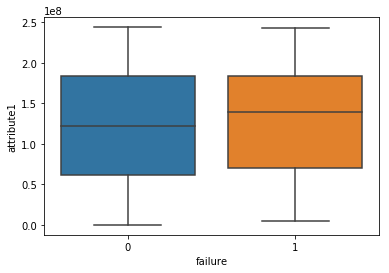

In [22]:
sns.boxplot(x=df.failure,  y = df.attribute1)

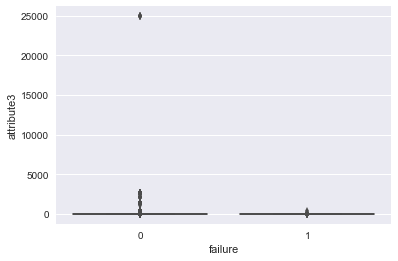

In [32]:
sns.boxplot(x=df.failure,  y = df.attribute3)

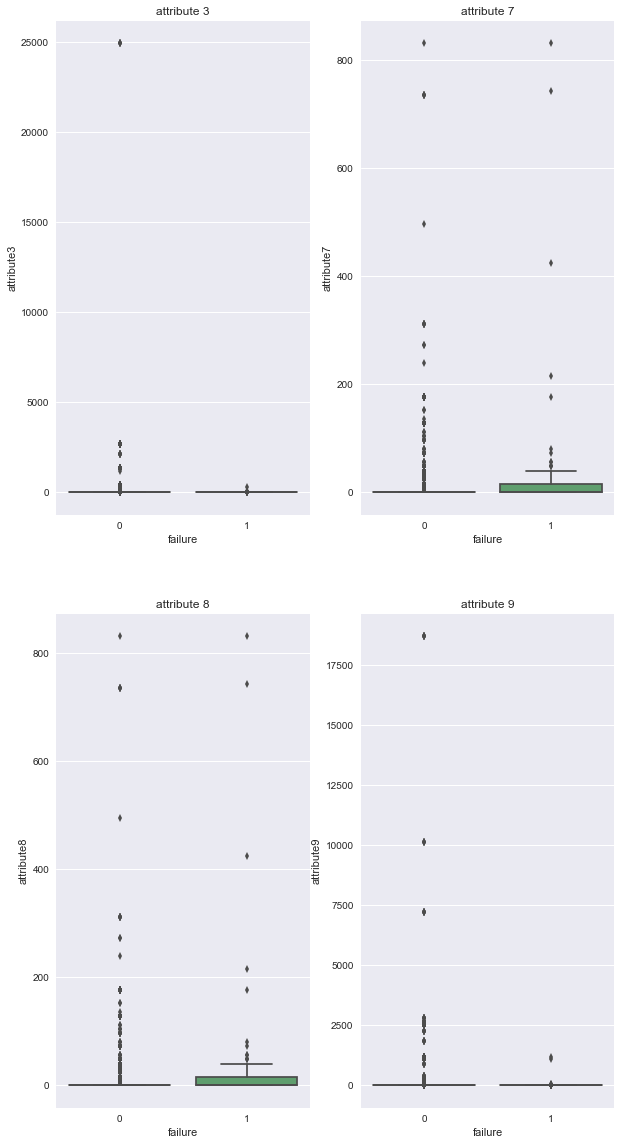

In [33]:
fig = plt.figure(figsize=(10,20))
ax1 = fig.add_subplot(221)
sns.boxplot(x=df.failure,  y = df.attribute3).set_title('attribute 3')
ax2 = fig.add_subplot(222)
sns.boxplot(x=df.failure,  y = df.attribute7).set_title('attribute 7')
ax3 = fig.add_subplot(223)
sns.boxplot(x=df.failure,  y = df.attribute8).set_title('attribute 8')
ax4 = fig.add_subplot(224)
sns.boxplot(x=df.failure,  y = df.attribute9).set_title('attribute 9')

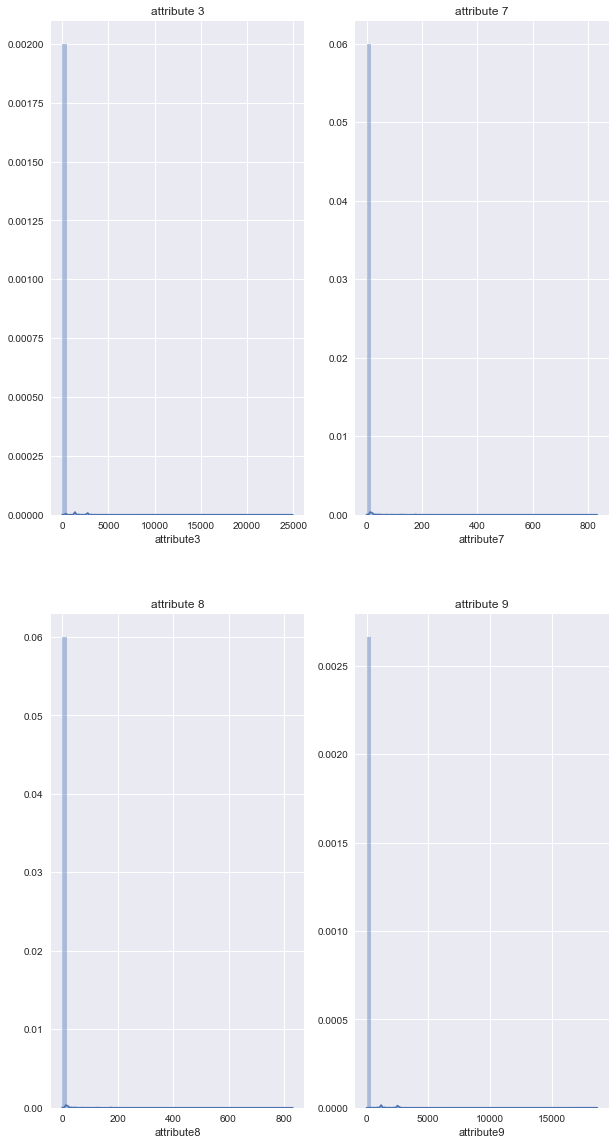

In [34]:
fig = plt.figure(figsize=(10,20))
ax1 = fig.add_subplot(221)
sns.distplot(df.attribute3).set_title('attribute 3')
ax2 = fig.add_subplot(222)
sns.distplot(df.attribute7).set_title('attribute 7')
ax3 = fig.add_subplot(223)
sns.distplot(df.attribute8).set_title('attribute 8')
ax4 = fig.add_subplot(224)
sns.distplot(df.attribute9).set_title('attribute 9')


In [20]:
devices = df.device.unique()

In [21]:
df_device = df.groupby(by="device").sum()

C:\Anaconda2\lib\site-packages\seaborn\categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


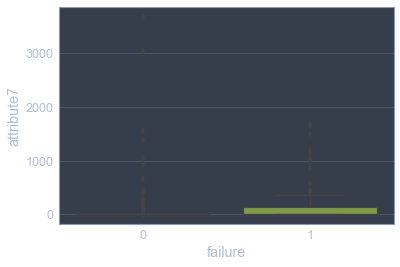

In [22]:
sns.boxplot(x=df_device.failure,  y = df_device.attribute7)

##  4. Feature Engineer: 

Convert attributes into log values

In [23]:
for i in df.columns:
    if i not in ['device', 'failure', 'date']:
        df[i] = np.log1p(df[i])

<br>Convert date into date type then to ordinal format

In [24]:
df['date'] = pd.to_datetime(df['date'])
df['date']=df['date'].apply(lambda x: x.toordinal())

In [26]:
slope_final = df
slope_final.head()

,device,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,failure,date
0,S1F01085,0.276836,0.0,0.0,0.0,0.0,0.000830,0.0,0.0,0.0,0,6
1,S1F013BB,0.352332,0.0,0.0,0.0,0.0,0.000060,0.0,0.0,0.0,0,6
2,S1F0166B,-0.286422,0.0,0.0,0.0,0.0,0.000706,0.0,0.0,0.0,0,6
3,S1F01E6Y,-0.001215,0.0,0.0,0.0,0.0,0.001591,0.0,0.0,0.0,0,48
4,S1F01JE0,0.152268,0.0,0.0,0.0,0.0,0.000829,0.0,0.0,0.0,0,6


### 5. Modeling

#### 5.1 Define Function to be used later:

In [27]:
def score_result(y, pred):
    print('Precision Score is', precision_score(y, pred))
    print('Recall Score is', recall_score(y, pred))
    print('f1_score is ', f1_score(y, pred))


def f1_score_1(model, fold = 5):
    f1_score = cross_val_score(estimator=model, cv=fold,X=x, y=y,scoring='f1')
    return f1_score
def precision_1(model, fold = 5):
    precision = cross_val_score(estimator=model, cv=fold,X=x, y=y,scoring='precision')
    return precision
def recall_s(model, fold = 5):
    recall_s = cross_val_score(estimator=model, cv=fold,X=x, y=y,scoring='recall')
    return recall_s
def Scoring(model):
    print("f1 score is: ", f1_score_1(model).mean())
    print("precision is: ", precision_1(model).mean())
    print("recall is: ", recall_s(model).mean())


def modelfit(alg, dtrain, target, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain, target)
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain)
    dtrain_predprob = alg.predict_proba(dtrain)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, dtrain, target, cv=cv_folds, scoring='recall')
    
    #Print model report:
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (
        np.mean(cv_score), np.std(cv_score), np.min(cv_score), np.max(cv_score)))

    #Print Feature Importance:
    if printFeatureImportance:
        #feat_imp = pd.Series(alg.feature_importances_, dtrain.columns.tolist()).sort_values(ascending=False)
        #feat_imp.plot(kind='bar', title='Feature Importances')
        #plt.ylabel('Feature Importance Score')
        feat_imp = pd.DataFrame(alg.feature_importances_, columns=['value'])
        x_columns = pd.DataFrame(dtrain.columns, columns = ['feature'])
        feat_imp = pd.concat([x_columns,feat_imp], axis = 1).sort_values(by = 'value', ascending = False)
        feat_imp = feat_imp.head(12)
        sns.barplot(x = feat_imp['value'], y = feat_imp['feature']).set_title('Feature Importance Score')

In [28]:
x = slope_final.drop(['device', 'failure'], axis =1)
y = slope_final['failure']
for i in ['attribute7', 'attribute8', 'attribute1', 'attribute2']:
    x[i]= x[i]**3

In [29]:
slope_final.head()

,device,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,failure,date
0,S1F01085,0.276836,0.0,0.0,0.0,0.0,0.000830,0.0,0.0,0.0,0,6
1,S1F013BB,0.352332,0.0,0.0,0.0,0.0,0.000060,0.0,0.0,0.0,0,6
2,S1F0166B,-0.286422,0.0,0.0,0.0,0.0,0.000706,0.0,0.0,0.0,0,6
3,S1F01E6Y,-0.001215,0.0,0.0,0.0,0.0,0.001591,0.0,0.0,0.0,0,48
4,S1F01JE0,0.152268,0.0,0.0,0.0,0.0,0.000829,0.0,0.0,0.0,0,6


<br>
#### List of Model and their initialization:

In [30]:
xgc = xgboost.XGBClassifier(n_estimators = 150, learning_rate = 0.1)
gbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=120, max_depth=3, min_samples_leaf=30, min_samples_split=5, subsample=0.9)
ada = AdaBoostClassifier(learning_rate = 0.4, n_estimators=100)
models_list = (xgc, gbc, ada)

#### Start Cross validation between different Models

XGB: 
f1 score is:  0.753271796956
precision is:  0.865392648287
recall is:  0.67012987013
None
Gradient Boost: 
f1 score is:  0.650733375283
precision is:  0.738675542611
recall is:  0.584415584416
None
AdaBoost: 
f1 score is:  0.572344947421
precision is:  0.810637254902
recall is:  0.461038961039
None
CV Score : Mean - 0.6701299 | Std - 0.1029684 | Min - 0.5238095 | Max - 0.8095238


C:\Anaconda2\lib\site-packages\seaborn\categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


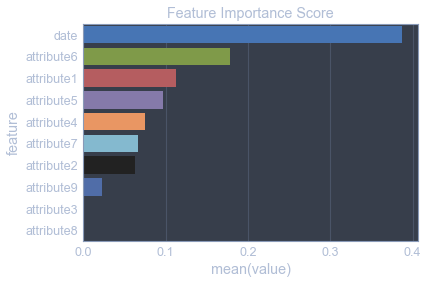

In [31]:
print("XGB: ")
print(Scoring(xgc))
print("Gradient Boost: ")
print(Scoring(gbc))
print("AdaBoost: ")
print(Scoring(ada))

modelfit(xgc, x, y)

### ReFeature Engineering to improve Score

<br>
##### Using groupby mean()

XGB: 
f1 score is:  0.629384445174
precision is:  0.724068627451
recall is:  0.557142857143
None
Gradient Boost: 
f1 score is:  0.618055950688
precision is:  0.706258169935
recall is:  0.537662337662
None
AdaBoost: 
f1 score is:  0.364972721013
precision is:  0.619047619048
recall is:  0.264935064935
None
CV Score : Mean - 0.5571429 | Std - 0.05947617 | Min - 0.4761905 | Max - 0.6190476


C:\Anaconda2\lib\site-packages\seaborn\categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


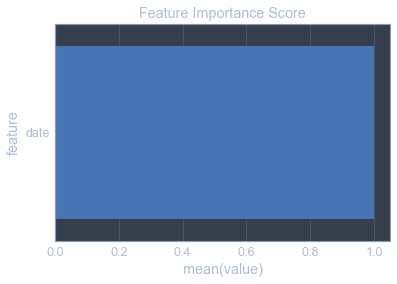

In [32]:
slope_final = pd.DataFrame([])
slope_df = df.groupby(by='device').mean()
failure = df.groupby(by='device').sum()
slope_final = pd.concat([slope_df.drop(['failure','date'], axis =1),failure['failure'].rename('failure')],axis =1)
date =  df.groupby(by='device').count()
slope_final = pd.concat([slope_final,date['date'].rename('date')],axis =1)
slope_final = slope_final.reset_index()

x = slope_final.loc[:, ['date']]
y = slope_final['failure']

print("XGB: ")
print(Scoring(xgc))

print("Gradient Boost: ")
print(Scoring(gbc))

print("AdaBoost: ")
print(Scoring(ada))

modelfit(xgc, x, y)

<br>
###### Using Group by sum()

In [33]:
slope_final = pd.DataFrame([])
slope_df = df.groupby(by='device').sum()
failure = df.groupby(by='device').sum()
slope_final = pd.concat([slope_df.drop(['failure','date'], axis =1),failure['failure'].rename('failure')],axis =1)
date =  df.groupby(by='device').count()
slope_final = pd.concat([slope_final,date['date'].rename('date')],axis =1)
slope_final = slope_final.reset_index()


x = slope_final.drop(['failure','device'], axis =1)
y = slope_final['failure']

print("XGB: ")
print(Scoring(xgc))

print("Gradient Boost: ")
print(Scoring(gbc))

print("AdaBoost: ")
print(Scoring(ada))


XGB: 
f1 score is:  0.646649419304
precision is:  0.80533022533
recall is:  0.55670995671
None
Gradient Boost: 
f1 score is:  0.674765772783
precision is:  0.790678210678
recall is:  0.649783549784
None
AdaBoost: 
f1 score is:  0.676845658509
precision is:  0.823692810458
recall is:  0.584415584416
None


Combine Columns 3 and 8

XGB: 
f1 score is:  0.755134145134
precision is:  0.855683325962
recall is:  0.679653679654
None
Gradient Boost: 
f1 score is:  0.699063314185
precision is:  0.815616246499
recall is:  0.632034632035
None
AdaBoost: 
f1 score is:  0.666148337277
precision is:  0.858810663021
recall is:  0.555411255411
None
CV Score : Mean - 0.6796537 | Std - 0.1167066 | Min - 0.5238095 | Max - 0.8571429


C:\Anaconda2\lib\site-packages\seaborn\categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


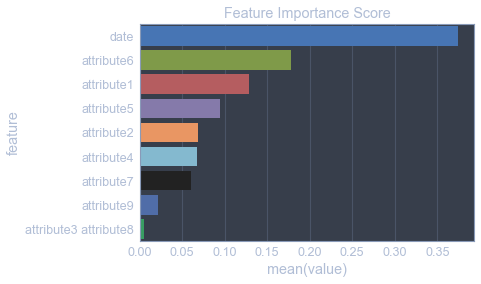

In [34]:
def transform_columns(list_feature, frame):
    frame[list_feature[0] + ' ' +list_feature[1]] = frame[list_feature[0]] + frame[list_feature[1]]
    frame1 = frame.drop([list_feature[0],list_feature[1]], axis =1)
    return frame1
df2 = df

slope_final = pd.DataFrame([])
df2 = transform_columns(['attribute3','attribute8'], df2)
for column in df2.columns:
    if column not in ['date', 'device','failure']:
        slope_df = df2.groupby(by='device').apply(lambda x: linregress(x.date,x[column])[0])
        slope_final = pd.concat([slope_final,slope_df.rename(column)],axis =1)
failure = df.groupby(by='device').sum()
slope_final = pd.concat([slope_final,failure['failure'].rename('failure')],axis =1)
date =  df.groupby(by='device').count()
slope_final = pd.concat([slope_final,date['date'].rename('date')],axis =1)
slope_final = slope_final.reset_index()

x = slope_final.drop(['device', 'failure'], axis =1)
y = slope_final['failure']

print("XGB: ")
print(Scoring(xgc))
print("Gradient Boost: ")
print(Scoring(gbc))
print("AdaBoost: ")
print(Scoring(ada))

modelfit(xgc, x, y)

### 6. Predict Model

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.80, random_state =1)

In [148]:
xgc = xgc.fit(x_train, y_train)

In [149]:
xgc_pred = xgc.predict(x_test)
xgc_proba = xgc.predict_proba(x_test)
xgc_pred = pd.Series(xgc_pred)

In [150]:
score_result(y_test, xgc_pred)

Precision Score is 0.916666666667
Recall Score is 0.647058823529
f1_score is  0.758620689655


In [151]:
xgc_proba1 = pd.DataFrame(xgc_proba,columns = ['Failure_0', 'Failure_1'])
xgc_pred1 = pd.DataFrame(xgc_pred,columns = ['predict'])

In [152]:
y1 = pd.DataFrame(y_test.reset_index()['failure'])
y1.columns = ['Actual']
final = pd.concat([y1,xgc_pred1], axis =1)
final = pd.concat([final,xgc_proba1], axis =1)

In [154]:
final

,Actual,predict,Failure_0,Failure_1
3,1,0,0.566581,0.433419
51,1,1,0.467719,0.532281
72,1,0,0.630675,0.369325
75,1,0,0.989623,0.010377
78,1,1,0.033312,0.966688
112,1,1,0.131767,0.868233
117,1,1,0.105323,0.894677
118,1,0,0.534185,0.465815
126,1,1,0.470645,0.529355
139,1,0,0.877689,0.122311
